In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pathlib
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

In [7]:
def make_confusion_matrix(model, model_type, test_dataset, dataset_Type, true_labels_names):
  predictions = model.predict(test_dataset)
  binary_predictions = (predictions > 0.5).astype("int32")
  true_labels = np.concatenate([y for x, y in test_dataset], axis=0)
  conf_matrix = confusion_matrix(true_labels, binary_predictions)
  conf_matrix_normalized_global = conf_matrix.astype('float') / conf_matrix.sum()

  # Plot the confusion matrix
  plt.figure(figsize=(10, 7))
  sns.heatmap(conf_matrix_normalized_global, annot=True, fmt=".2%", cmap='Greens',
              xticklabels= true_labels_names, #['Predicted Negative', 'Predicted Positive'],
              yticklabels= true_labels_names) #['Actual Negative', 'Actual Positive'])
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title(f'Confusion Matrix (for {dataset_Type} test set - {model_type})')
  plt.show()

In [4]:
# Mass set predictions
IMG_SIZE = (200, 200) # define image size
calc_test_set_path = "/content/drive/MyDrive/Project_4/calc_test_cropped"
calc_test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = calc_test_set_path,
                                                                image_size=IMG_SIZE,
                                                                label_mode="binary",
                                                                batch_size=32,
                                                                shuffle=False
                                                                )
calc_data_dir = pathlib.Path(calc_test_set_path)
calc_true_labels_names = calc_test_data.class_names # np.array(sorted([item.name for item in data_dir.glob("*")]))
print(f"Class Names (in encoded order): {calc_true_labels_names}")

Found 196 files belonging to 2 classes.
Class Names (in encoded order): ['BENIGN_WITHOUT_CALLBACK', 'MALIGNANT']


In [5]:
mass_test_set_path = "/content/drive/MyDrive/Project_4/mass_test_cropped"
mass_test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = mass_test_set_path,
                                                                image_size=IMG_SIZE,
                                                                label_mode="binary",
                                                                batch_size=32,
                                                                shuffle=False
                                                                )
mass_data_dir = pathlib.Path(mass_test_set_path)
mass_true_labels_names = mass_test_data.class_names
print(f"Class Names (in encoded order): {mass_true_labels_names}")

Found 184 files belonging to 2 classes.
Class Names (in encoded order): ['BENIGN_WITHOUT_CALLBACK', 'MALIGNANT']


6/6 [==============================] - 29s 3s/step


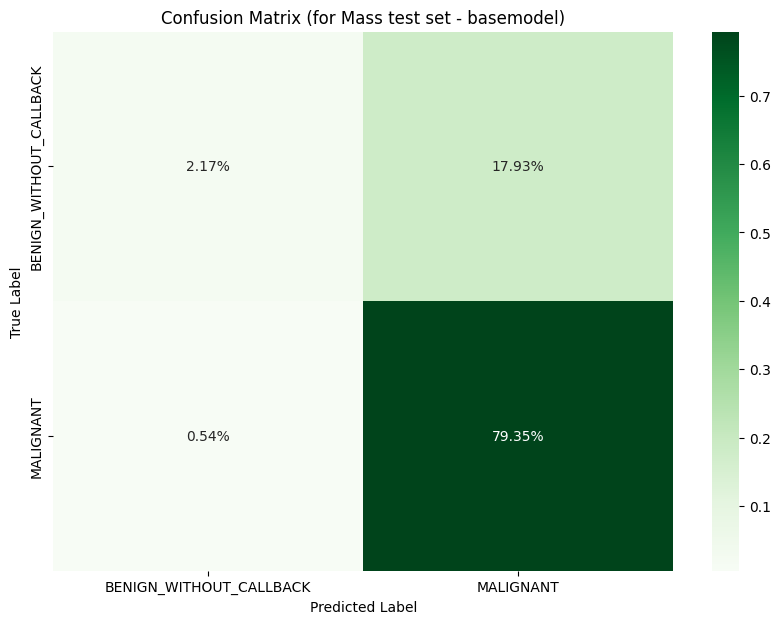

In [8]:
# Results
mass_loaded_model_onlyTF = load_model('/content/drive/MyDrive/Project_4/model_0_EfficientNetV2B0_onlyTF_B-M_onMassData.h5')
make_confusion_matrix(mass_loaded_model_onlyTF, "basemodel", mass_test_data, "Mass", mass_true_labels_names)

6/6 [==============================] - 2s 83ms/step


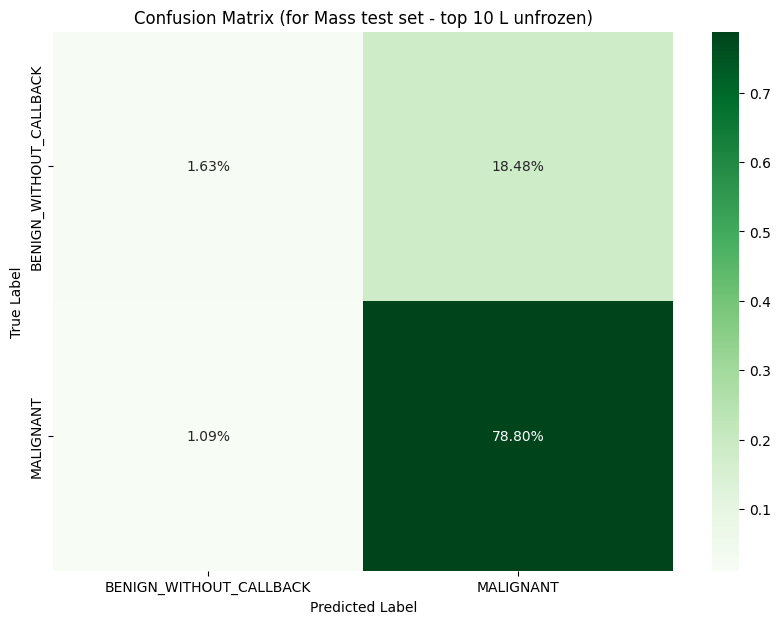

In [9]:
mass_loaded_model_TF_FT_10L = load_model('/content/drive/MyDrive/Project_4/model_0_EfficientNetV2B0_TF-FT-10L_BWC-M-onMassData.h5')
make_confusion_matrix(mass_loaded_model_TF_FT_10L, "top 10 L unfrozen", mass_test_data, "Mass", mass_true_labels_names)

6/6 [==============================] - 2s 125ms/step


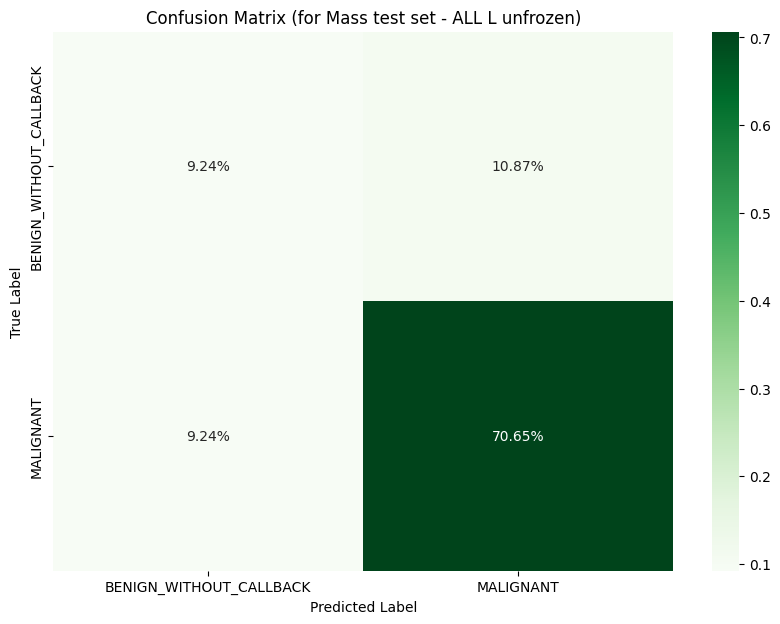

In [10]:
mass_loaded_model_TF_FT_ALL = load_model('/content/drive/MyDrive/Project_4/model_1_EfficientNetV2B0_TF-FT-ALL_BWC-M-onMassData.h5')
make_confusion_matrix(mass_loaded_model_TF_FT_ALL, "ALL L unfrozen", mass_test_data, "Mass", mass_true_labels_names)

7/7 [==============================] - 23s 3s/step


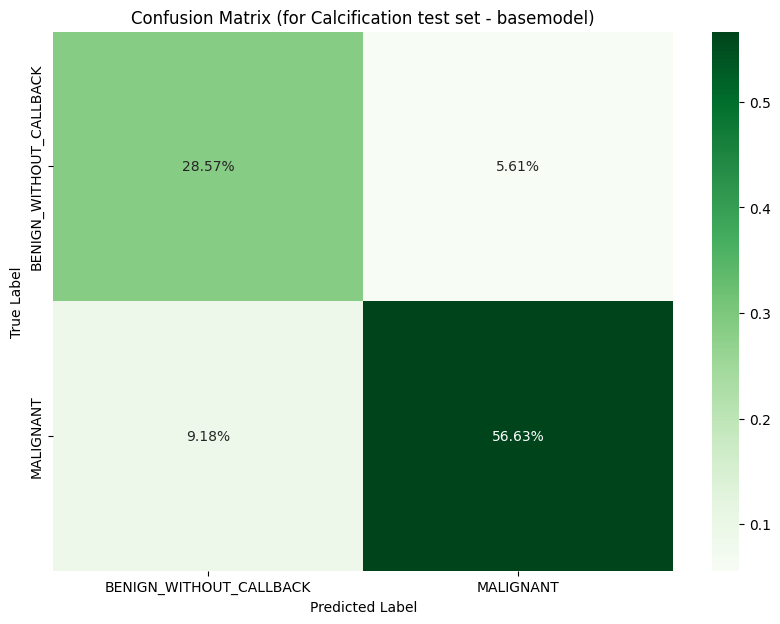

In [11]:
calc_loaded_model_onlyTF = load_model('/content/drive/MyDrive/Project_4/model_0_EfficientNetV2B0_onlyTF_BWC-M.h5')
make_confusion_matrix(calc_loaded_model_onlyTF, "basemodel", calc_test_data, "Calcification", calc_true_labels_names)

7/7 [==============================] - 3s 179ms/step


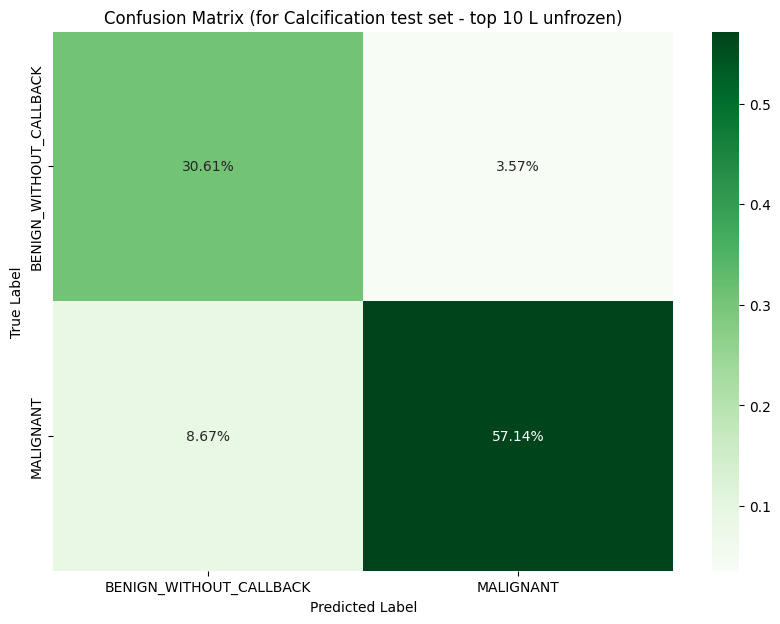

In [12]:
calc_loaded_model_TF_FT_10L = load_model('/content/drive/MyDrive/Project_4/model_0_EfficientNetV2B0_TF-FT-10L_BWC-M.h5')
make_confusion_matrix(calc_loaded_model_TF_FT_10L, "top 10 L unfrozen", calc_test_data, "Calcification", calc_true_labels_names)

7/7 [==============================] - 3s 172ms/step


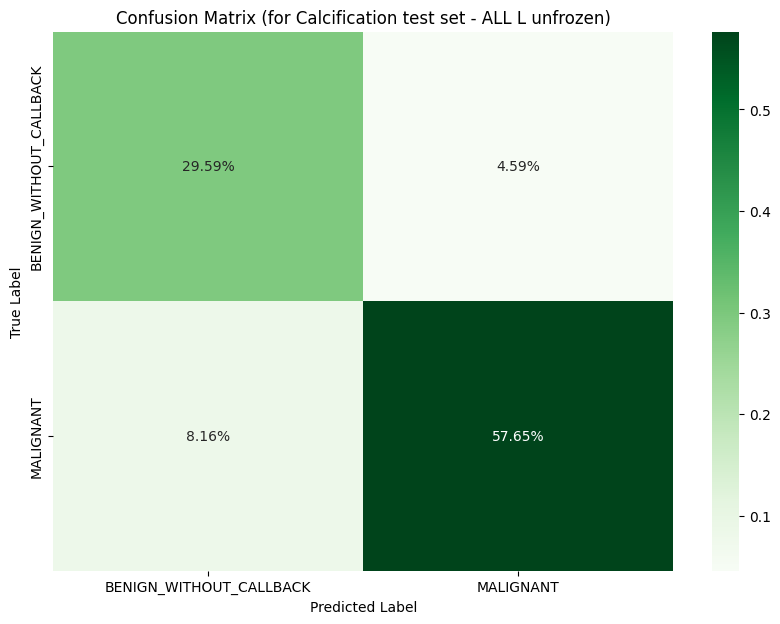

In [13]:
calc_loaded_model_TF_FT_ALL = load_model('/content/drive/MyDrive/Project_4/model_1_EfficientNetV2B0_TF-FT-ALL_BWC-M.h5')
make_confusion_matrix(calc_loaded_model_TF_FT_ALL, "ALL L unfrozen", calc_test_data, "Calcification", calc_true_labels_names)